Artículo replicado: [Clic aquí](https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook#Data-Cleaning)


Autor: [Luca Basanisi](https://www.linkedin.com/in/lucabasanisi/)

In [0]:
# Importamos las librerías necesarias para el experimento.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [0]:
# Cargamos la información.

credit_card_data = pd.read_csv("CreditCardData.csv")
credit_card_data.drop("Unnamed: 0", inplace = True, axis = 1)

In [43]:
# Mostramos los primeros registros.

credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Revisando valores faltantes

credit_card_data.count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [9]:
# Revisando columnas con valores nulos

credit_card_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [44]:
#Renombrando 'PAY_0' a 'PAY_1' y 'default payment next month' a 'DEF_PAY'

credit_card_data = credit_card_data.rename(columns={'default payment next month': 'DEF_PAY', 'PAY_0': 'PAY_1'})
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [0]:
# Separando la variable Target

X = credit_card_data.drop(['ID','DEF_PAY'], axis=1)
y = credit_card_data['DEF_PAY']

In [0]:
# Separando la data de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Creando el método
dsc = DecisionTreeClassifier(max_depth=10, random_state=14) 

# Entrenando el método
dsc.fit(X_train, y_train)

# Haciendo nuestra predicción con data de prueba
predicciones = dsc.predict(X_test)

# Calculando nuestra presición
accuracy_score(y_true = y_test, y_pred = predicciones)

0.812

In [49]:
# Calculando los parámetros óptimos para el método
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# Como se indica en la documentación, este método aplica validación cruzada

# Definiendo los parámetros a probar y su valores
# Parámetros especificados en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {
    'max_depth': np.arange(3, 10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes': [5,10,20,100],
    'min_samples_split': [2, 5, 10, 20]
  }

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

# Entrenando el método
grid_tree.fit(X_train, y_train)

# Mostramos el mejor estimador
print(grid_tree.best_estimator_)

# Mostrar la mejor presición alcanzada
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8212916666666666


In [50]:
# Aplicando los parámetros obtenidos en la anterior consulta 

dtc_gt = grid_tree.best_estimator_ # Asignando el método con los mejores valores para los parámetros

# Entrenando el método
dtc_gt.fit(X_train, y_train)

# Haciendo nuestra predicción con data de prueba
predicciones_dtc_gt = dtc_gt.predict(X_test)

# Calculando nuestra presición
accuracy_score(y_true = y_test, y_pred = predicciones_dtc_gt)

0.821

In [51]:
#Obtenemos la importancia de cada característica

def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'], ascending=False)
    return result

caracteristicas_originales = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
  
get_feature_importance(dtc_gt, caracteristicas_originales)

,feat,score
5,PAY_1,0.726661
6,PAY_2,0.145168
19,PAY_AMT3,0.050531
9,PAY_5,0.024013
11,BILL_AMT1,0.021003
7,PAY_3,0.012056
10,PAY_6,0.008907
2,EDUCATION,0.007298
18,PAY_AMT2,0.002871
20,PAY_AMT4,0.001492


In [52]:
# Entrenamos un modelo usando solo la columna 'PAY_1', la más importante según la función anterior
X_PAY1 = X[['PAY_1']].copy()

X_train_pay1, X_test_pay1, y_train_pay1, y_test_pay1 = train_test_split(X_PAY1, y, test_size=0.20, random_state=42)

dtc_pay1 = grid_tree.best_estimator_
dtc_pay1.fit(X_train_pay1, y_train_pay1)

pre_x_pay1 = dtc_gt.predict(X_test_pay1)
accuracy_score(y_true = y_test_pay1, y_pred = pre_x_pay1)

0.8193333333333334

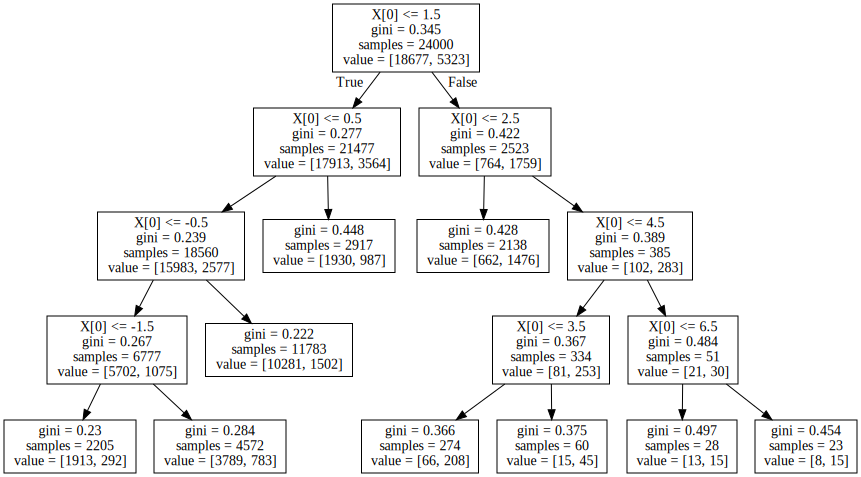

In [53]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dtc_pay1, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In [54]:
# Debido a que accuracy puede ser una métrica engañosa el autor recomienda usar la métrica f1-score

from sklearn.metrics import f1_score

f1_score(y_true = y_test, y_pred = predicciones_dtc_gt)

0.4683168316831683

In [55]:
# Armando la matriz de confusión

# True Positive (TP)
TP = np.sum(np.logical_and(predicciones_dtc_gt == 1, y_test == 1))
 
# True Negative (TN)
TN = np.sum(np.logical_and(predicciones_dtc_gt == 0, y_test == 0))
 
# False Positive (FP)
FP = np.sum(np.logical_and(predicciones_dtc_gt == 1, y_test == 0))
 
# False Negative (FN)
FN = np.sum(np.logical_and(predicciones_dtc_gt == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 473, FP: 234, TN: 4453, FN: 840


In [21]:
# Usando la nueva métrica para establecer los mejores valores para los parámetros del método

param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1') # Usando f1 en el parámetro scoring

# Entrenamiento GridSearchCV
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

#Entrenamiento DecisionTreeClassifier
dtc_gsv_f1 = best
dtc_gsv_f1.fit(X_train, y_train)
pred_f1 = dtc_gsv_f1.predict(X_test)

# Cracteristicas importantes
print("-------------")
print(f1_score(y_true = y_test, y_pred = pred_f1))
print(get_feature_importance(dtc_gsv_f1, caracteristicas_originales))
print("-------------")

# Matriz de confusión
TP = np.sum(np.logical_and(pred_f1 == 1, y_test == 1))
TN = np.sum(np.logical_and(pred_f1 == 0, y_test == 0))
FP = np.sum(np.logical_and(pred_f1 == 1, y_test == 0))
FN = np.sum(np.logical_and(pred_f1 == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.4808469166137819
-------------
0.4735565259582727
         feat     score
5       PAY_1  0.700515
6       PAY_2  0.139945
19   PAY_AMT3  0.053490
9       PAY_5  0.023149
11  BILL_AMT1  0.018404
7       PAY_3  0.016853
0   LIMIT_BAL  0.014510
2   EDUCATION  0.009847
10      PAY_6  0.008586
8       PAY_4  0.007819
4         AGE  0.004113
18   PAY_AMT2  0.002768
3    MARRIAGE  0.000000
1         SEX  0.000000
12  BILL_AMT2  0.000000
13  BILL_AMT3  0.000000
14  BILL_AMT4  0.000000
15  BILL_AMT5  0.000000
16  BILL_AMT6  0.000000
17   PAY_AMT1  0.000000
20   PAY_AMT4  0.000000
21   PAY_AMT5  0.000

In [56]:
# El autor señala la mejora del estimador agregando un parámetro.

param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20],
             'class_weight' : ['balanced']} # parámetro y valor agregado para mejorar el método

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')

# Entrenamiento GridSearchCV
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

#Entrenamiento DecisionTreeClassifier
dtc_gsv_f1 = best
dtc_gsv_f1.fit(X_train, y_train)
pred_f1 = dtc_gsv_f1.predict(X_test)

# Cracteristicas importantes
print("-------------")
print(f1_score(y_true = y_test, y_pred = pred_f1))
print(get_feature_importance(dtc_gsv_f1, caracteristicas_originales))
print("-------------")

# Matriz de confusión
TP = np.sum(np.logical_and(pred_f1 == 1, y_test == 1))
TN = np.sum(np.logical_and(pred_f1 == 0, y_test == 0))
FP = np.sum(np.logical_and(pred_f1 == 1, y_test == 0))
FN = np.sum(np.logical_and(pred_f1 == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.527531438172145
-------------
0.5203784570596798
         feat     score
5       PAY_1  0.782776
18   PAY_AMT2  0.069381
8       PAY_4  0.049357
6       PAY_2  0.039653
0   LIMIT_BAL  0.021069
20   PAY_AMT4  0.011959
19   PAY_AMT3  0.011690
7       PAY_3  0.006434
2   EDUCATION  0.004715
11  BILL_AMT1  0.002967
10      PAY_6  0.000000
1         SEX  0.000000
12  BILL_AMT2  0.000000
13  BILL_AMT3  0.000000
14  BILL_AMT4  0.000000
15  BILL_AMT5  0.000000
16  BILL_AMT6  0.000000
17   PAY_AMT1  0.000000
9       PAY_5  0.000000
4         AGE  0.000000
3    MARRIAGE  0.000000
21   PAY_AMT

<h2>Limpieza de datos</h2>

In [57]:
fil = (credit_card_data.EDUCATION == 5) | (credit_card_data.EDUCATION == 6) | (credit_card_data.EDUCATION == 0)
credit_card_data.loc[fil, 'EDUCATION'] = 4
credit_card_data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [58]:
credit_card_data.loc[credit_card_data.MARRIAGE == 0, 'MARRIAGE'] = 3
credit_card_data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [0]:
def draw_histograms(credit_card_data, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        credit_card_data[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

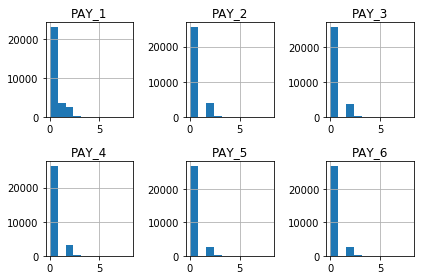

In [60]:
# Estableciendo valores menores o iguales a 0 en valor 0

fil = (credit_card_data.PAY_1 == -2) | (credit_card_data.PAY_1 == -1) | (credit_card_data.PAY_1 == 0)
credit_card_data.loc[fil, 'PAY_1'] = 0
fil = (credit_card_data.PAY_2 == -2) | (credit_card_data.PAY_2 == -1) | (credit_card_data.PAY_2 == 0)
credit_card_data.loc[fil, 'PAY_2'] = 0
fil = (credit_card_data.PAY_3 == -2) | (credit_card_data.PAY_3 == -1) | (credit_card_data.PAY_3 == 0)
credit_card_data.loc[fil, 'PAY_3'] = 0
fil = (credit_card_data.PAY_4 == -2) | (credit_card_data.PAY_4 == -1) | (credit_card_data.PAY_4 == 0)
credit_card_data.loc[fil, 'PAY_4'] = 0
fil = (credit_card_data.PAY_5 == -2) | (credit_card_data.PAY_5 == -1) | (credit_card_data.PAY_5 == 0)
credit_card_data.loc[fil, 'PAY_5'] = 0
fil = (credit_card_data.PAY_6 == -2) | (credit_card_data.PAY_6 == -1) | (credit_card_data.PAY_6 == 0)
credit_card_data.loc[fil, 'PAY_6'] = 0

late = credit_card_data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

<h2>Ingeniería de características</h2>

In [0]:
# Es más relevante mantener la información de género y estado civil en una característica.

credit_card_data['SE_MA'] = 0
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.MARRIAGE == 1)) , 'SE_MA'] = 1 # Hombre casado
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.MARRIAGE == 2)) , 'SE_MA'] = 2 # Hombre soltero
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.MARRIAGE == 3)) , 'SE_MA'] = 3 # Hombre divorciado
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.MARRIAGE == 1)) , 'SE_MA'] = 4 # Mujer casada
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.MARRIAGE == 2)) , 'SE_MA'] = 5 # Mujer soltera
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.MARRIAGE == 3)) , 'SE_MA'] = 6 # Mujer divorciada

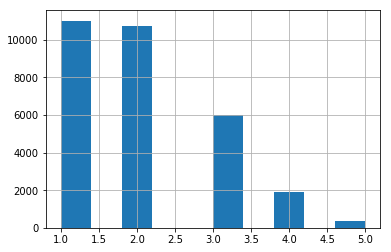

In [62]:
#Agrupando la categoría 6 con la categoría 5 por no tener la población suficiente

credit_card_data['AgeBin'] = pd.cut(credit_card_data['AGE'], 6, labels = [1,2,3,4,5,6])
credit_card_data['AgeBin'] = pd.to_numeric(credit_card_data['AgeBin'])
credit_card_data.loc[(credit_card_data['AgeBin'] == 6) , 'AgeBin'] = 5
credit_card_data.AgeBin.hist()

In [0]:
# Agrupando género con rango de edades.

credit_card_data['SE_AG'] = 0
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.AgeBin == 1)) , 'SE_AG'] = 1 #hombre dentro de los 20's
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.AgeBin == 2)) , 'SE_AG'] = 2 #hombre dentro de los 30's
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.AgeBin == 3)) , 'SE_AG'] = 3 #hombre dentro de los 40's
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.AgeBin == 4)) , 'SE_AG'] = 4 #hombre dentro de los 50's
credit_card_data.loc[((credit_card_data.SEX == 1) & (credit_card_data.AgeBin == 5)) , 'SE_AG'] = 5 #hombre dentro de los 60's y más
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.AgeBin == 1)) , 'SE_AG'] = 6 #mujer dentro de los 20's
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.AgeBin == 2)) , 'SE_AG'] = 7 #mujer dentro de los 30's
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.AgeBin == 3)) , 'SE_AG'] = 8 #mujer dentro de los 40's
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.AgeBin == 4)) , 'SE_AG'] = 9 #mujer dentro de los 50's
credit_card_data.loc[((credit_card_data.SEX == 2) & (credit_card_data.AgeBin == 5)) , 'SE_AG'] = 10 #mujer dentro de los 60's y más

In [0]:
# Gastos promedio en un mes determinado dividido entre LIMIT_BAL para tener una especie de exageración de cuán descuidado es el cliente (Indica el autor)

credit_card_data['Avg_exp_5'] = ((credit_card_data['BILL_AMT5'] - (credit_card_data['BILL_AMT6'] - credit_card_data['PAY_AMT5']))) / credit_card_data['LIMIT_BAL']

credit_card_data['Avg_exp_4'] = (((credit_card_data['BILL_AMT5'] - (credit_card_data['BILL_AMT6'] - credit_card_data['PAY_AMT5'])) +
                 (credit_card_data['BILL_AMT4'] - (credit_card_data['BILL_AMT5'] - credit_card_data['PAY_AMT4']))) / 2) / credit_card_data['LIMIT_BAL']

credit_card_data['Avg_exp_3'] = (((credit_card_data['BILL_AMT5'] - (credit_card_data['BILL_AMT6'] - credit_card_data['PAY_AMT5'])) +
                 (credit_card_data['BILL_AMT4'] - (credit_card_data['BILL_AMT5'] - credit_card_data['PAY_AMT4'])) +
                 (credit_card_data['BILL_AMT3'] - (credit_card_data['BILL_AMT4'] - credit_card_data['PAY_AMT3']))) / 3) / credit_card_data['LIMIT_BAL']

credit_card_data['Avg_exp_2'] = (((credit_card_data['BILL_AMT5'] - (credit_card_data['BILL_AMT6'] - credit_card_data['PAY_AMT5'])) +
                 (credit_card_data['BILL_AMT4'] - (credit_card_data['BILL_AMT5'] - credit_card_data['PAY_AMT4'])) +
                 (credit_card_data['BILL_AMT3'] - (credit_card_data['BILL_AMT4'] - credit_card_data['PAY_AMT3'])) +
                 (credit_card_data['BILL_AMT2'] - (credit_card_data['BILL_AMT3'] - credit_card_data['PAY_AMT2']))) / 4) / credit_card_data['LIMIT_BAL']

credit_card_data['Avg_exp_1'] = (((credit_card_data['BILL_AMT5'] - (credit_card_data['BILL_AMT6'] - credit_card_data['PAY_AMT5'])) +
                 (credit_card_data['BILL_AMT4'] - (credit_card_data['BILL_AMT5'] - credit_card_data['PAY_AMT4'])) +
                 (credit_card_data['BILL_AMT3'] - (credit_card_data['BILL_AMT4'] - credit_card_data['PAY_AMT3'])) +
                 (credit_card_data['BILL_AMT2'] - (credit_card_data['BILL_AMT3'] - credit_card_data['PAY_AMT2'])) +
                 (credit_card_data['BILL_AMT1'] - (credit_card_data['BILL_AMT2'] - credit_card_data['PAY_AMT1']))) / 5) / credit_card_data['LIMIT_BAL']

In [0]:
# Almacenando de manera histórica que tan lejos está la factura del límite.

credit_card_data['Closeness_6'] = (credit_card_data.LIMIT_BAL - credit_card_data.BILL_AMT6) / credit_card_data.LIMIT_BAL
credit_card_data['Closeness_5'] = (credit_card_data.LIMIT_BAL - credit_card_data.BILL_AMT5) / credit_card_data.LIMIT_BAL
credit_card_data['Closeness_4'] = (credit_card_data.LIMIT_BAL - credit_card_data.BILL_AMT4) / credit_card_data.LIMIT_BAL
credit_card_data['Closeness_3'] = (credit_card_data.LIMIT_BAL - credit_card_data.BILL_AMT3) / credit_card_data.LIMIT_BAL
credit_card_data['Closeness_2'] = (credit_card_data.LIMIT_BAL - credit_card_data.BILL_AMT2) / credit_card_data.LIMIT_BAL
credit_card_data['Closeness_1'] = (credit_card_data.LIMIT_BAL - credit_card_data.BILL_AMT1) / credit_card_data.LIMIT_BAL

In [0]:
# Definiendo características y separando nueva data de entrenamiento y prueba

features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = credit_card_data['DEF_PAY'].copy() # target
X = credit_card_data[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [67]:
# Entrenamiento GridSearchCV
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

#Entrenamiento DecisionTreeClassifier
dtc_gsv_f1 = best
dtc_gsv_f1.fit(X_train, y_train)
pred_f1 = dtc_gsv_f1.predict(X_test)

# calculando el Score
print("F1 score:")
print(f1_score(y_true = y_test, y_pred = pred_f1)) # F1 score: 0.5128044971892567

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.5262454974618334
F1 score:
0.5128044971892567


<h2>Sección agregada para comparación con  resultados propios</h2>

In [0]:
from sklearn import metrics

def print_binary_confusion_matrix(y_true, y_pred):
  
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  TN = confusion_matrix[0,0]
  FN = confusion_matrix[1,0]
  FP = confusion_matrix[0,1]
  TP = confusion_matrix[1,1]
  
  ### INICIO DE TU CÓDIGO
  exactitud = (TP+TN)/(TP+FP+TN+FN)
  precision = TP/(TP+FP)
  exhaustividad = TP/(TP+FN)
  ### FIN DE TU CÓDIGO

  print ('              +-----------------+')
  print ('              |   Predicción    |')
  print ('              +-----------------+')
  print ('              |    +   |    -   |')
  print ('+-------+-----+--------+--------+')
  print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
  print ('| real  +-----+--------+--------+')
  print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
  print ('+-------+-----+--------+--------+')
  print('Exactitud     : {:.3f}'.format(exactitud))
  print('Precisión     : {:.3f}'.format(precision))
  print('Exhaustividad : {:.3f}'.format(exhaustividad))
  print()

In [69]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# Parámetros especificados en: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {
    'max_depth': np.arange(3, 10),
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes': [5,10,20,100],
    'min_samples_split': [2, 5, 10, 20],
    'class_weight' : ['balanced']
  }

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy', verbose = 1, n_jobs = -1)

# Entrenando el método
grid_tree.fit(X_train, y_train)

# Mostramos el mejor estimador
mejor_estimador = grid_tree.best_estimator_


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  4.7min finished


In [70]:
#Entrenamiento del módelo considerando el mejor estimador con Train
modelo_cart = mejor_estimador
modelo_cart.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
#Resultados con Test
print("Matriz de Confusión - Conjunto Test")
print_binary_confusion_matrix(y_test, modelo_cart.predict(X_test)) #Matriz de confusión

Matriz de Confusión - Conjunto Test
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    718 |    595 |
| real  +-----+--------+--------+
|       |  -  |    826 |   3861 |
+-------+-----+--------+--------+
Exactitud     : 0.763
Precisión     : 0.465
Exhaustividad : 0.547



In [76]:
# Validación cruzada para evaluar el rendimiento del modelo
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=modelo_cart, X=X_train, y=y_train, cv=10, n_jobs=-1)

print('precisiones: {}'.format(precision))
print('Precisión promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision), np.std(precision)))
print('Presición Test:', modelo_cart.score(X_test, y_test))

precisiones: [0.7638484  0.77051229 0.77634319 0.77583333 0.7775     0.7875
 0.77166667 0.762401   0.762401   0.75197999]
Precisión promedio:  0.770 +/-  0.010
Presición Test: 0.7631666666666667
